In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import matplotlib

from write_read_cache import store_data, read_data
from read_events import read_events, get_events

cache_folder = "cache/transfer_function"

In [2]:
# Return raw data from transfer function file
def read_transfer_function(filepath):
    fdt_data = pd.read_csv(filepath, sep="\t", comment="#")
    return fdt_data


# Get fdt data from raw fdt data file
def get_fdt(fdt_data, ch, pt):
    dac_inj_list = np.unique(fdt_data.iloc[:, 1].to_numpy())

    dac_inj_all = []
    fdt_out_all = []
    for dac_inj in dac_inj_list:
        fdt_data_subset = fdt_data[
            (fdt_data.iloc[:, 1] == dac_inj) & (fdt_data.iloc[:, 3] == ch)
        ]
        dac_inj_all.append(dac_inj)
        fdt_out_all.append(np.mean(fdt_data_subset.iloc[:, 4]))

    return dac_inj_all, fdt_out_all


In [16]:
# Import transfer function data
fdt_m55_3mbar = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m55_3mbar, "fdt_m55_3mbar", cache_folder)

fdt_m55_amb = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m55_amb, "fdt_m55_amb", cache_folder)

fdt_m37_amb = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m37_amb, "fdt_m37_amb", cache_folder)


In [14]:
# Get module temperature in Celsius
def get_temperature(temp_code):
    V_T = 0.9 * 1000 - (temp_code - 1024) * 1.72 / (3.87)
    T = 30 + (5.506 - np.sqrt((-5.506) ** 2 + 4 * 0.00172 * (870.6 - V_T))) / (
        2 * (-0.00172)
    )
    return [np.round(T, 1)]


# Get real asic temperature
def get_temperature_file(filepath):
    temp_raw = pd.read_csv(
        filepath,
        comment="#",
        sep="\t",
        header=None,
    )
    temp_celsius = get_temperature(np.mean(temp_raw.iloc[:, 1]))[0]

    return temp_celsius


-44.7
-52.9
-36.6


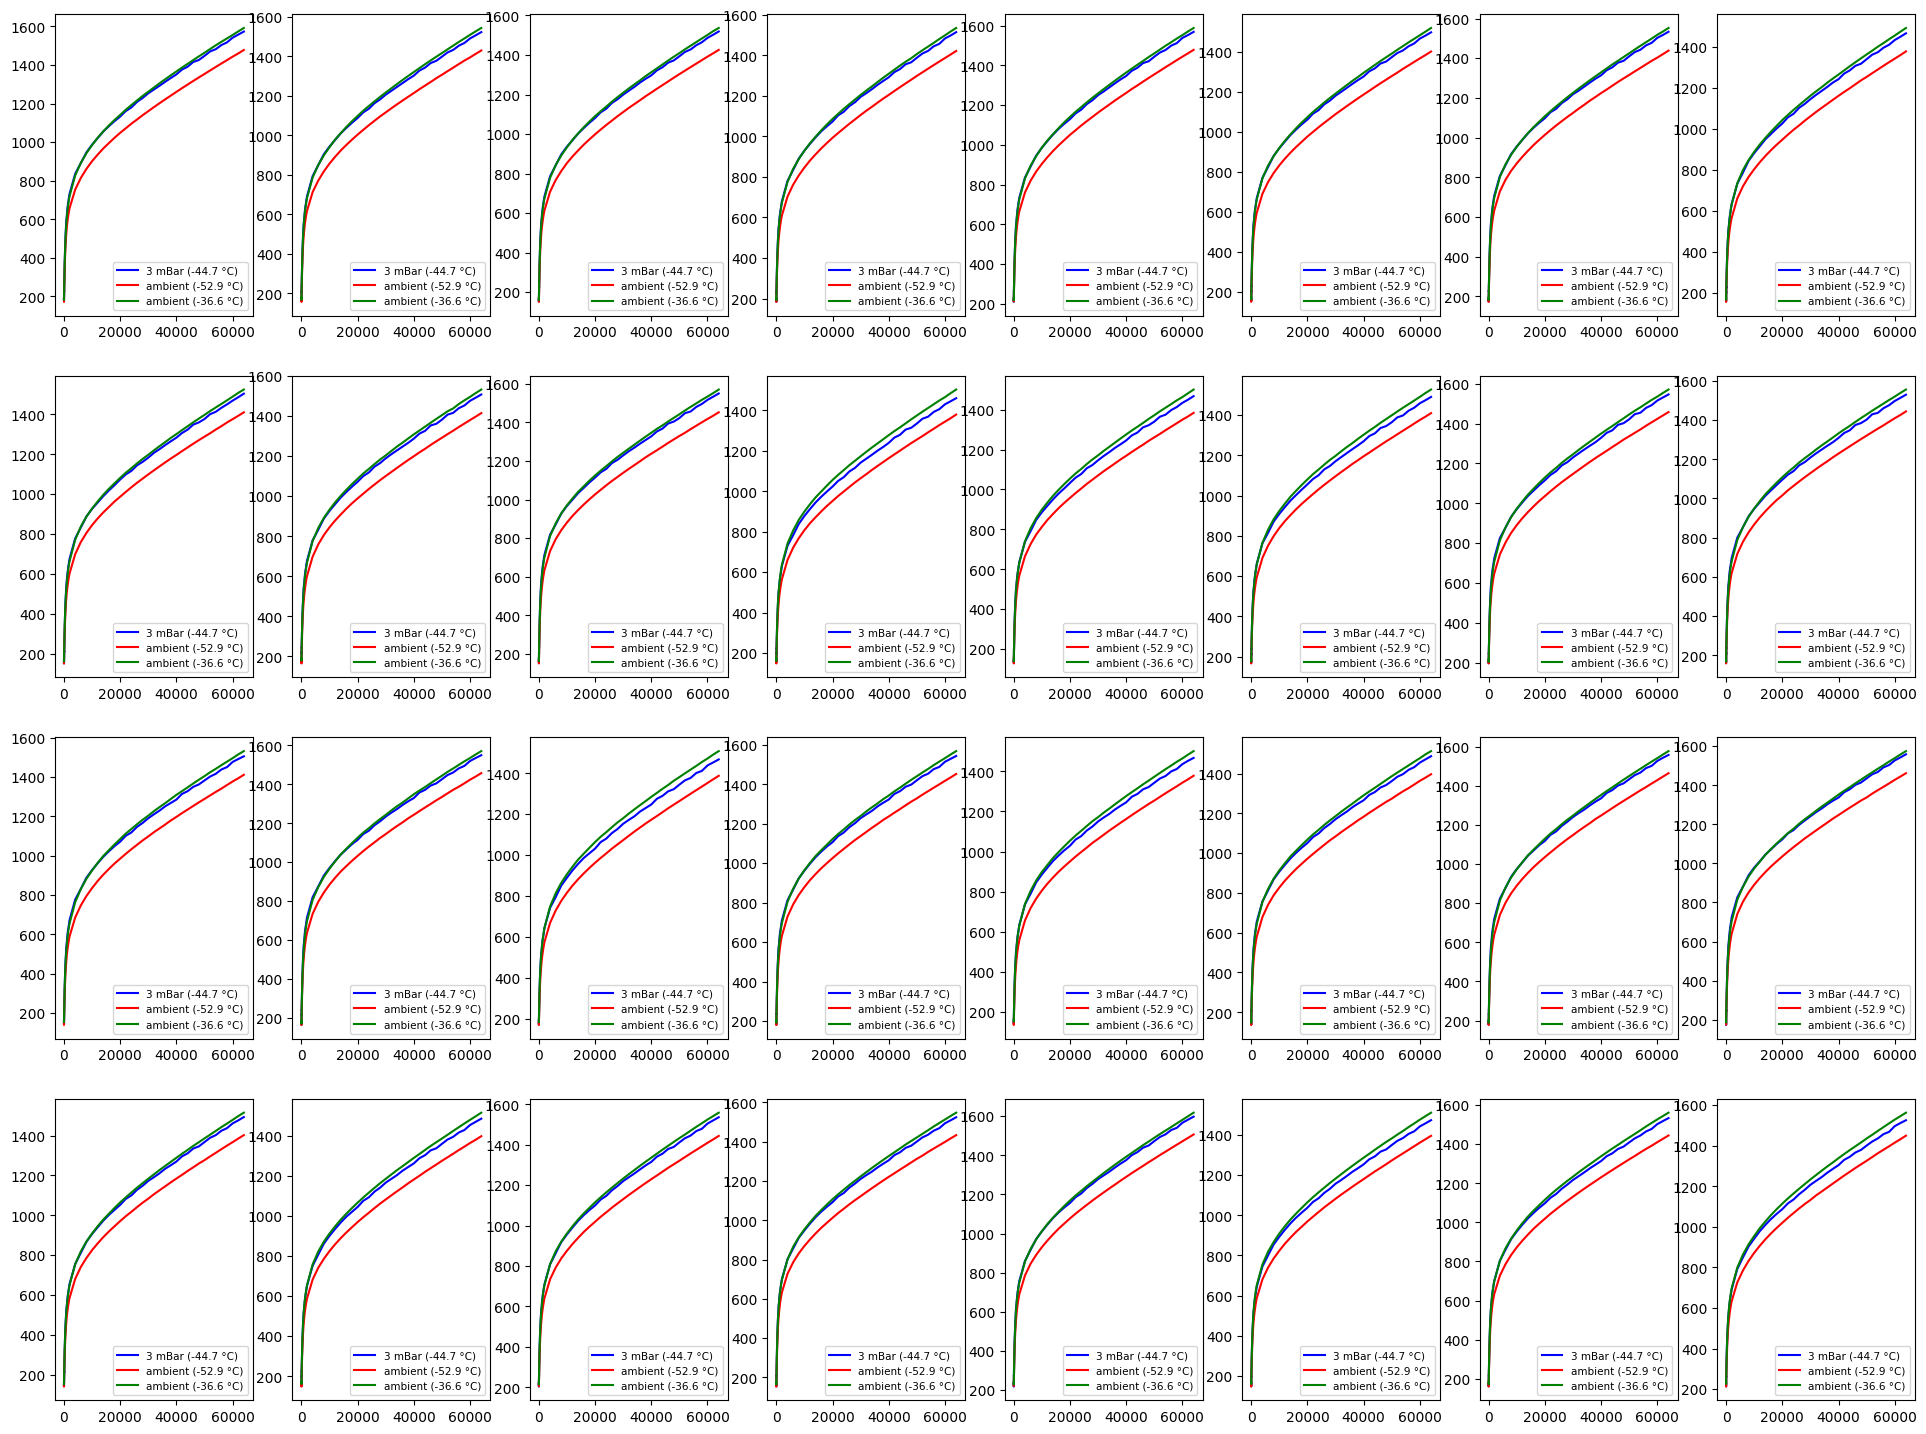

In [26]:
# Transfer function at -55 C and 3 mBar

fdt_m55_3mbar = read_data("fdt_m55_3mbar", cache_folder)
fdt_m55_amb = read_data("fdt_m55_amb", cache_folder)
fdt_m37_amb = read_data("fdt_m37_amb", cache_folder)

# Get real temperature from board
temp_m55_3mbar = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\HK_Temperature.dat"
)
temp_m55_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

temp_m37_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

print(temp_m55_3mbar)
print(temp_m55_amb)
print(temp_m37_amb)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]

plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    dac_inj, fdt_out = get_fdt(
        fdt_m55_3mbar,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="blue", label="3 mBar (-44.7 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m55_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="red", label="ambient (-52.9 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m37_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="green", label="ambient (-36.6 °C)")

    plt.legend(fontsize=7.5)
    # plt.xscale("log")
    # plt.yscale("log")

plt.show()
